# SMC Data analysis

Import diferent libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
# libraries for import all file names
from os import listdir
from os.path import isfile, join
from statsmodels.tsa.seasonal import seasonal_decompose

## Analisis de les Estacions 

In [2]:
path = "Sr_15125_CC.xlsx"
data = pd.read_excel("dataSMC/"+path, index_col=0)
data.dtypes

DATA    datetime64[ns]
PPT            float64
'SH'            object
dtype: object

### Estacions amb dades Complertes (a tractar) --> del 2009 a 2022

| CODI\_ESTACIO | NOM\_ESTACIO               | CODI\_TIPUS | LATITUD   | LONGITUD | Georeferència            | EMPLACAMENT                              | ALTITUD | CODI\_MUNICIPI | NOM\_MUNICIPI              | CODI\_COMARCA | NOM\_COMARCA    | CODI\_PROVINCIA | NOM\_PROVINCIA | CODI\_XARXA | NOM\_XARXA | CODI\_ESTAT | NOM\_ESTAT | DATA\_ALTA             |
| ------------- | -------------------------- | ----------- | --------- | -------- | ------------------------ | ---------------------------------------- | ------- | -------------- | -------------------------- | ------------- | --------------- | --------------- | -------------- | ----------- | ---------- | ----------- | ---------- | ---------------------- |
| CC            | Orís                       | A           | 4.207.398 | 220.862  | POINT (2.20862 42.07398) | Abocador comarcal                        | 626     | 573            | Orís                       | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 11/15/1995 12:00:00 AM |
| CG            | Molló - Fabert             | A           | 4.237.717 | 241.456  | POINT (2.41456 42.37717) | Veïnat de Fabert                         | 1405    | 706            | Molló                      | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 06/06/1996 12:00:00 AM |
| CI            | Sant Pau de Segúries       | A           | 4.225.839 | 236.429  | POINT (2.36429 42.25839) | Estació meteorològica municipal          | 852     | 714            | Sant Pau de Segúries       | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/24/1995 12:00:00 AM |
| CY            | Muntanyola                 | A           | 4.187.813 | 217.873  | POINT (2.17873 41.87813) | Esglèsia de St. Quirze i Sta. Julita     | 816     | 571            | Muntanyola                 | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 01/12/1996 12:00:00 AM |
| DG            | Núria (1.971 m)            | A           | 4.239.848 | 215.517  | POINT (2.15517 42.39848) | Santuari de Núria                        | 1971.4  | 710            | Queralbs                   | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/15/1998 12:00:00 AM |
| DJ            | Banyoles                   | A           | 4.211.653 | 278.969  | POINT (2.78969 42.11653) | Abocador comarcal de Puigpalter          | 176     | 636            | Banyoles                   | 28            | Pla de l'Estany | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 10/11/1999 12:00:00 AM |
| DN            | Anglès                     | A           | 4.196.095 | 263.108  | POINT (2.63108 41.96095) | Poliesportiu municipal                   | 150     | 779            | Anglès                     | 34            | Selva           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/10/2001 12:00:00 AM |
| KE            | Pantà de Sau               | A           | 4.196.867 | 241.404  | POINT (2.41404 41.96867) | Central hidroelèctrica de Sau            | 426     | 606            | Vilanova de Sau            | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 01/05/1996 12:00:00 AM |
| M6            | Sant Joan de les Abadesses | A           | 4.222.189 | 2.2427   | POINT (2.2427 42.22189)  | Agrupació Esportiva del Ripollès         | 730     | 713            | Sant Joan de les Abadesses | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 01/13/1996 12:00:00 AM |
| UB            | la Tallada d'Empordà       | A           | 4.205.398 | 306.195  | POINT (3.06195 42.05398) | Findació Mas Badia - Canet de la Tallada | 15      | 278            | La Tallada d'Empordà       | 10            | Baix Empordà    | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/01/1989 12:00:00 AM |
| UN            | Cassà de la Selva          | A           | 4.187.449 | 292.694  | POINT (2.92694 41.87449) | Finca Mas Bassets                        | 171     | 462            | Cassà de la Selva          | 20            | Gironès         | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 03/08/1993 12:00:00 AM |
| UO            | Fornells de la Selva       | A           | 4.191.461 | 282.069  | POINT (2.82069 41.91461) | La Torre de Reset                        | 97      | 466            | Fornells de la Selva       | 20            | Gironès         | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/10/1998 12:00:00 AM |
| V3            | Gurb                       | A           | 4.195.224 | 223.271  | POINT (2.23271 41.95224) | Masia Can Borra                          | 509     | 564            | Gurb                       | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 03/31/1999 12:00:00 AM |
| V4            | Montesquiu                 | A           | 4.211.477 | 221.483  | POINT (2.21483 42.11477) | Castell de Montesquiu                    | 684     | 570            | Montesquiu                 | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 12/02/1998 12:00:00 AM |
| VN            | Vilobí d'Onyar             | A           | 4.188.244 | 274.262  | POINT (2.74262 41.88244) | Camps de Can Salvà                       | 117     | 803            | Vilobí d'Onyar             | 34            | Selva           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 11/10/1998 12:00:00 AM |
| WS            | Viladrau                   | A           | 4.184.008 | 241.877  | POINT (2.41877 41.84008) | Mas Vilarmau                             | 953     | 605            | Viladrau                   | 24            | Osona           | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 03/17/2005 12:00:00 AM |
| V5            | Perafita                   | A           | 4.203.947 | 211.993  | POINT (2.11993 42.03947) | Finca la Tria                            | 774     | 575            | Perafita                   | 24            | Osona           | 8               | Barcelona      | 1           | XEMA       | 2           | Operativa  | 07/03/1995 12:00:00 AM |

In [3]:
path = 'dataSMC/'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]

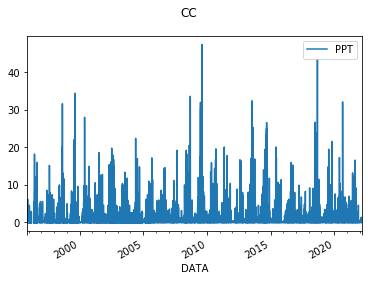

                 PPT
count  448101.000000
mean        0.040169
std         0.452507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        47.400000


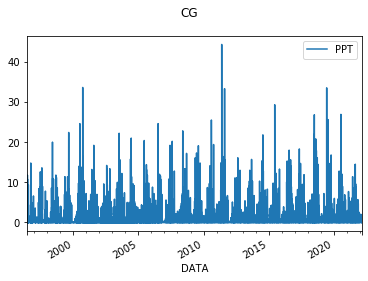

                 PPT
count  437708.000000
mean        0.062689
std         0.498569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        44.300000


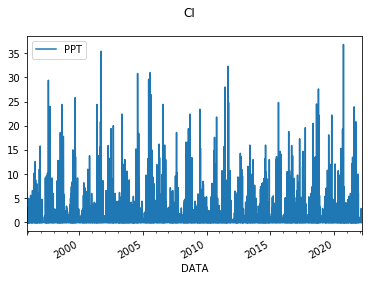

                 PPT
count  459795.000000
mean        0.059475
std         0.512629
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        36.800000


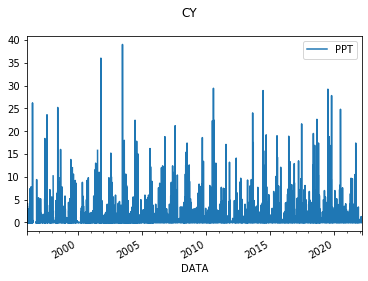

                 PPT
count  445512.000000
mean        0.035417
std         0.383927
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        39.000000


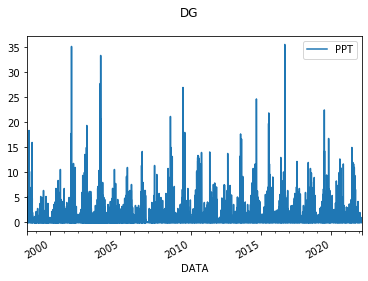

                 PPT
count  410486.000000
mean        0.061160
std         0.421503
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.600000


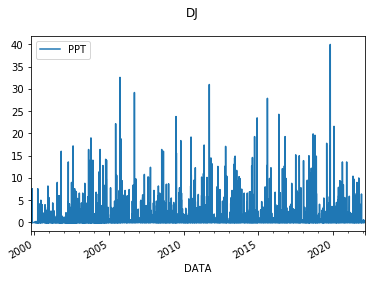

                 PPT
count  388689.000000
mean        0.038782
std         0.402163
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        40.000000


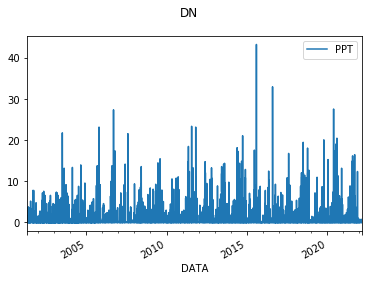

                 PPT
count  362747.000000
mean        0.042244
std         0.415399
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.300000


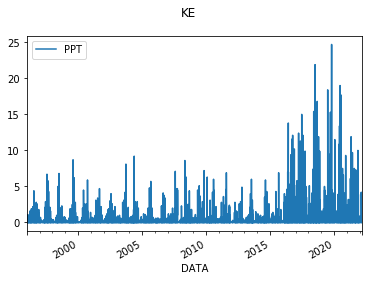

                 PPT
count  458240.000000
mean        0.015371
std         0.214041
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.700000


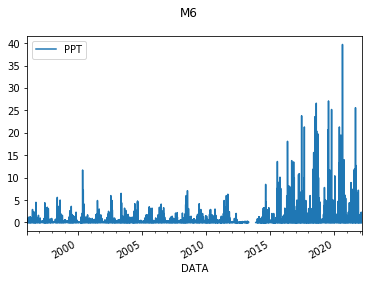

                 PPT
count  443682.000000
mean        0.018743
std         0.264397
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        39.700000


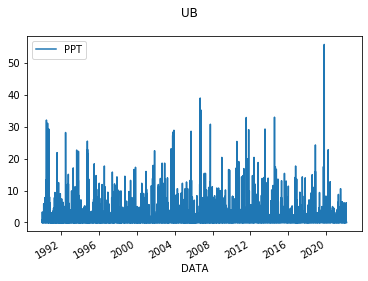

                 PPT
count  345394.000000
mean        0.058726
std         0.575368
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        55.800000


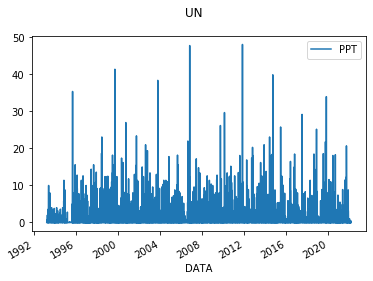

                 PPT
count  317957.000000
mean        0.061674
std         0.572991
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        48.100000


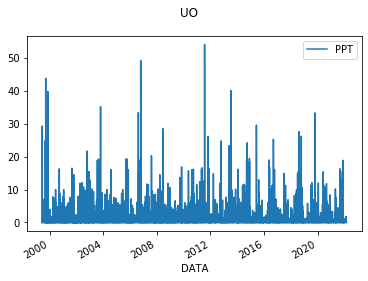

                 PPT
count  266339.000000
mean        0.056529
std         0.572824
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        54.100000


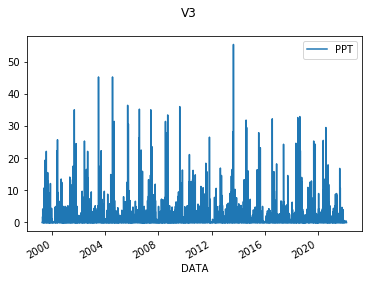

                 PPT
count  270240.000000
mean        0.056449
std         0.606241
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        55.300000


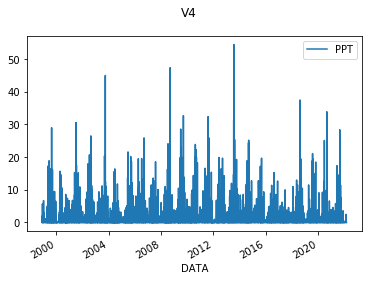

                 PPT
count  272005.000000
mean        0.064386
std         0.620161
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        54.500000


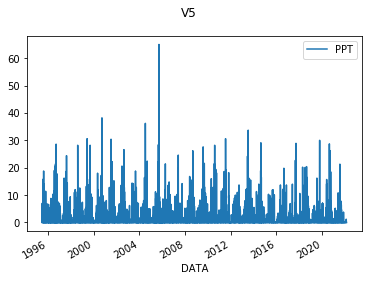

                 PPT
count  302205.000000
mean        0.062924
std         0.605752
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        65.000000


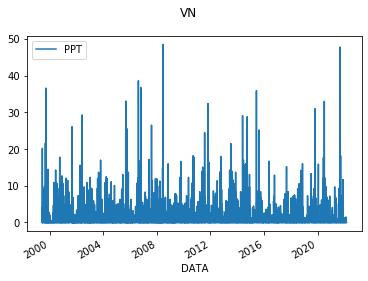

                 PPT
count  265819.000000
mean        0.055262
std         0.551767
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        48.500000


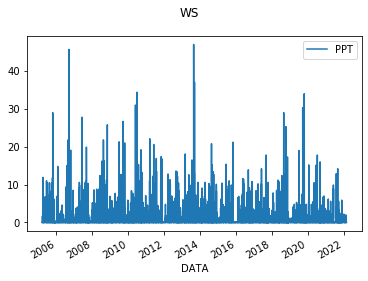

                 PPT
count  217618.000000
mean        0.074046
std         0.641457
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        47.000000


In [4]:
for path in filePaths:
    # REGEX que agafa el nom de l'estació a partir del nom de l'arxiu
    namePath = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    # creem el path
    data = pd.read_excel("dataSMC/"+path, index_col=0)
    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "PPT"]].set_index('DATA')
    # imprimim l'histograma i la descripció
    data.plot(title=namePath, subplots=True)    
    plt.show()
    print(data.describe())

A simple vista podem observar com les dades de l'estació KE i M6 son una mica sospitoses, ja que a partir del 2015 la mitja de plujes puja considerablement

In [5]:
path = 'dataSMC/'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]

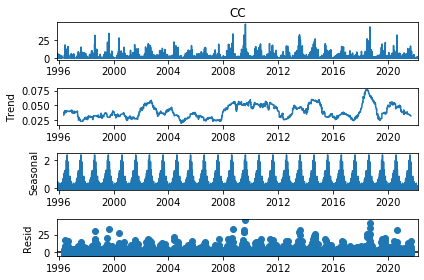

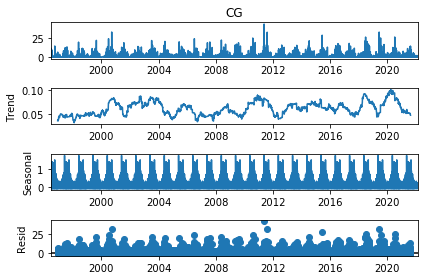

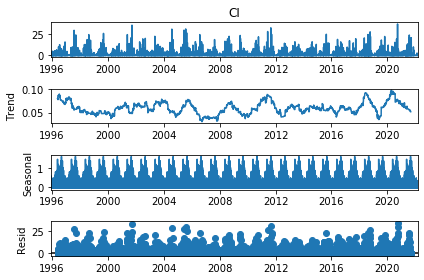

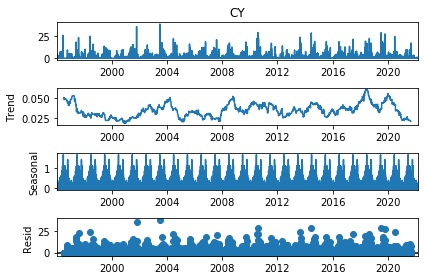

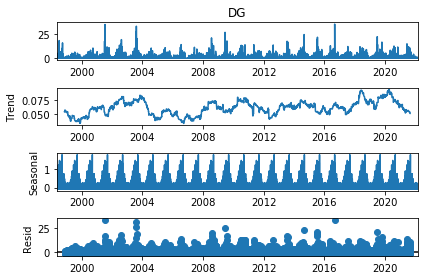

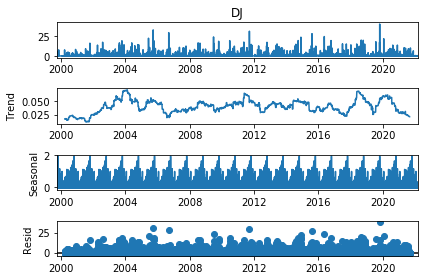

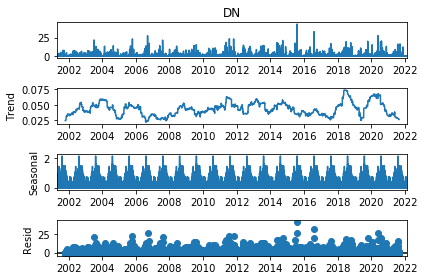

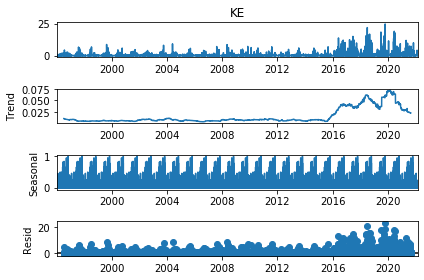

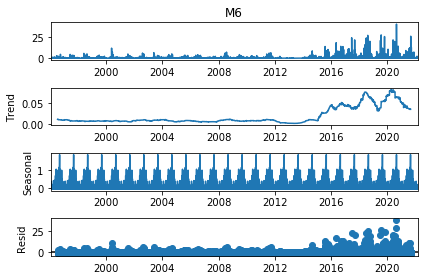

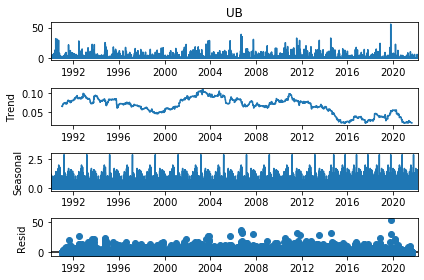

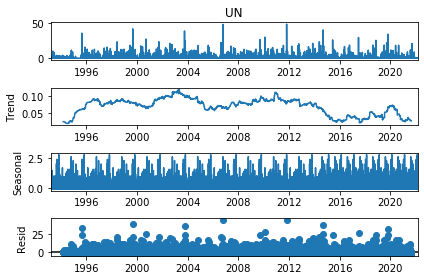

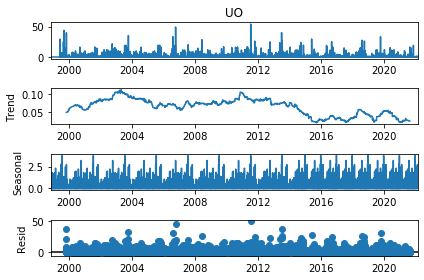

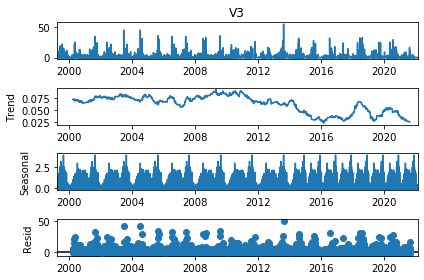

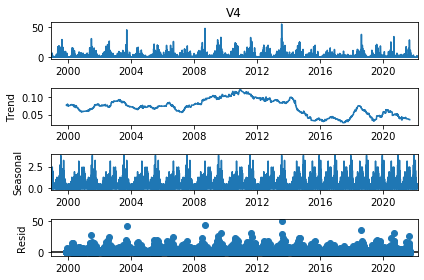

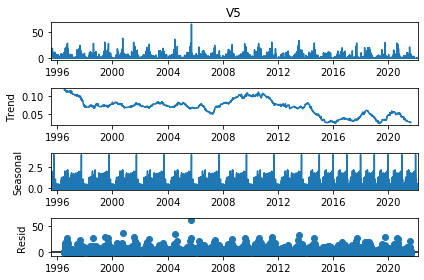

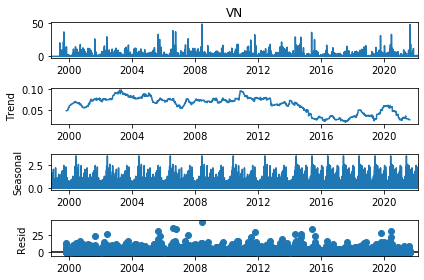

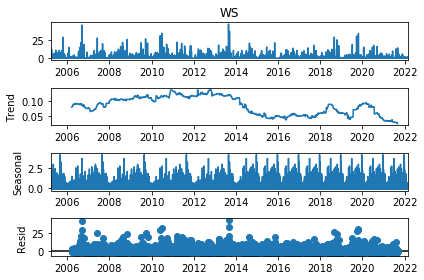

In [6]:
for path in filePaths:
    # REGEX que agafa el nom de l'estació a partir del nom de l'arxiu
    weatherStationName = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    # creem el path
    data = pd.read_excel("dataSMC/"+path, index_col=0)
    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "PPT"]].set_index('DATA')
    # posem 0's als nan
    data['PPT'] = data['PPT'].replace(np.nan, 0)
    # PPT al nom de l'estació
    data.rename(columns = {'PPT': weatherStationName}, inplace = True)
    # imprimim l'histograma i la descripció
    df_seasonal = seasonal_decompose(data[weatherStationName],model='additive', period=17520)
    df_seasonal.plot()    
    plt.show()

Podem afirmar que les estacions KE i M6 tenen algun problema amb les dades, ja que el seu trend comparat amb els altres es diferent. També s'observa variacions amb el trend de les estacions a partir de la UB. Això passa perquè la freqüència de les estacions passa de dades cada 1h a dades cada 30 min.

Buscant les estacions KE i M6 per altres fonts, he trobat que els primers registres estan pel 2016. He enviat un correu al SMC avisant de la anomalia i descarto les estacions?

#### ( KE i M6 )
Sergi Ger

e-mail: sgerroca7@alumnes.ub.edu

Ref.: 15613


Benvolgut,

En atenció a la sol·licitud rebuda el dia 6/04/2022 referent a la tramesa de dades que us vam entregar amb la sol·licitud DATMET-15125 i en la que ens demaneu si tenim constància que el patró de les dades de les estacions KE i M6 a patir del 2016 aproximadament  canvia completament, ens hem de disculpar perquè les dades que us vam enviar d’aquestes dues estacions no eren correctes, així com tampoc les dades de l’estació amb codi KP.

L’explicació rau en el fet que aquestes estacions són un cas particular dins la XEMA i el mètode que vam usar per a la confecció dels fitxers no ho va tenir en consideració. Aquestes tres estacions es van integrar a la XEMA durant l’any 2015 (prèviament eren gestionades per l’Agència Catalana de l’Aigua). Per aquest motiu, aquestes estacions només disposen de dades de període SH, a partir de la data de la seva integració a la XEMA en algun moment del 2015, i en lloc de dades semihoràries com la resta d’estacions de la XEMA disposen de dades de període de 5 min per a tot el període anterior a la data d’integració que us facilitem a continuació:

...

|     Codi EMA    |     Nom EMA                       |     Comarca     |     Data inici    |     Data integració a la XEMA    |     X UTM (m)    |     Y UTM (m)    |     Z (m)    |
|-----------------|-----------------------------------|-----------------|-------------------|----------------------------------|------------------|------------------|--------------|
|     M6          |     Sant Joan de les Abadesses    |     Ripollès    |     13/01/1996    |     03/07/2015                   |     437500       |     4674691      |     730      |
|     KE          |     Pantà de Sau                  |     Osona       |     05/01/1996    |     12/11/2015                   |     451448       |     4646464      |     426      |

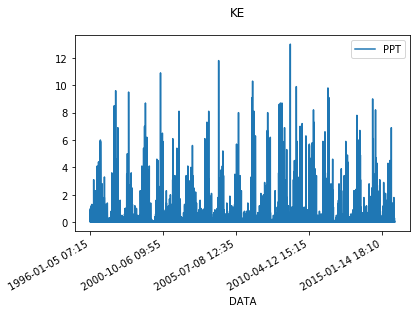

                PPT
count  2.089157e+06
mean   7.309120e-03
std    9.589433e-02
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.300000e+01


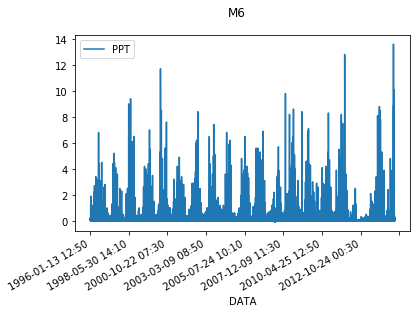

                PPT
count  1.970115e+06
mean   7.915579e-03
std    9.590338e-02
min   -1.000000e-01
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    1.360000e+01


In [7]:
path = 'dataSMC/SMC_KP_M6_KE'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
for path in filePaths:
    # REGEX que agafa el nom de l'estació a partir del nom de l'arxiu
    namePath = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    # creem el path
    data = pd.read_csv("dataSMC/SMC_KP_M6_KE/"+path, sep='\t')
    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "PPT"]].set_index('DATA')
    # imprimim l'histograma i la descripció
    data.plot(title=namePath, subplots=True)    
    plt.show()
    print(data.describe())

### Estacions a tractar

| CODI\_ESTACIO | NOM\_ESTACIO       | CODI\_TIPUS | LATITUD   | LONGITUD | Georeferència            | EMPLACAMENT                                  | ALTITUD | CODI\_MUNICIPI | NOM\_MUNICIPI | CODI\_COMARCA | NOM\_COMARCA | CODI\_PROVINCIA | NOM\_PROVINCIA | CODI\_XARXA | NOM\_XARXA | CODI\_ESTAT | NOM\_ESTAT    | DATA\_ALTA             | DATA\_BAIXA            |
| ------------- | ------------------ | ----------- | --------- | -------- | ------------------------ | -------------------------------------------- | ------- | -------------- | ------------- | ------------- | ------------ | --------------- | -------------- | ----------- | ---------- | ----------- | ------------- | ---------------------- | ---------------------- |
| DM            | Girona - Bombers   | A           | 4.196.012 | 280.696  | POINT (2.80696 41.96012) | Parc de Bombers                              | 90      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 05/10/2001 12:00:00 AM | 09/15/2010 12:00:00 AM |
| WF            | Vilablareix        | A           | 4.195.425 | 277.578  | POINT (2.77578 41.95425) | Mas Saüch                                    | 108     | 482            | Vilablareix   | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 04/11/2001 12:00:00 AM | 10/01/2015 12:00:00 AM |
| XJ            | Girona             | A           | 4.198.223 | 280.686  | POINT (2.80686 41.98223) | Horts de Santa Eugènia                       | 72      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/15/2010 12:00:00 AM |                        |
| Z4            | Ulldeter (2.364 m) | A           | 4.242.205 | 2.2524   | POINT (2.2524 42.42205)  | Ulldeter                                     | 2364    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 11/08/2000 12:00:00 AM | 09/20/2011 12:00:00 AM |
| ZC            | Ulldeter (2.410 m) | A           | 4.242.117 | 224.565  | POINT (2.24565 42.42117) | Ulldeter                                     | 2410    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/28/2011 12:00:00 AM |

In [5]:
path = 'dataSMC/ATractar/'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]

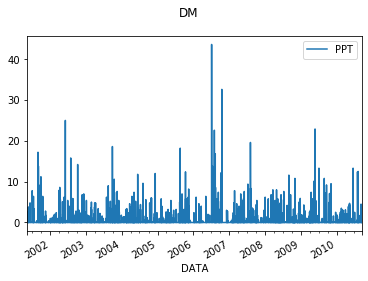

                 PPT
count  163895.000000
mean        0.038387
std         0.388760
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.600000


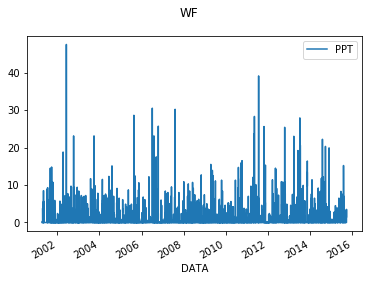

                 PPT
count  137960.000000
mean        0.073574
std         0.638906
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        47.500000


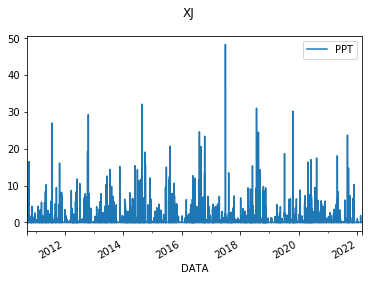

                 PPT
count  200850.000000
mean        0.040379
std         0.452619
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        48.300000


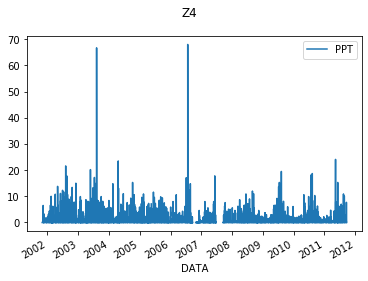

                 PPT
count  111025.000000
mean        0.119290
std         0.694499
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        68.000000


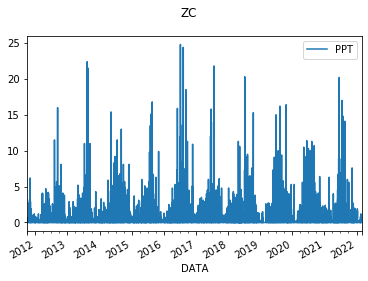

                 PPT
count  182715.000000
mean        0.076797
std         0.463391
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        24.800000


In [6]:
for path in filePaths:
    # REGEX que agafa el nom de l'estació a partir del nom de l'arxiu
    namePath = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    # creem el path
    data = pd.read_excel("dataSMC/ATractar/"+path, index_col=0)
    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "PPT"]].set_index('DATA')
    # imprimim l'histograma i la descripció
    data.plot(title=namePath, subplots=True)    
    plt.show()
    print(data.describe())

## Generar DataFrame de SMC

### DataFrame de les estacions dades complertes ( a tractar --> però amb diferents freqüències)

In [8]:
# Genero la base del que serà el gran DF Inicial
df = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')

In [9]:
# itero per totes les dades i creo el df
path = 'dataSMC/'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
for path in filePaths:
    weatherStationName = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    data = pd.read_excel("dataSMC/"+path, index_col=0)
    data = data[["DATA", "PPT"]].set_index('DATA')
    data.rename(columns = {'PPT': weatherStationName}, inplace = True)
    df = df.join(data, how='left')

In [10]:
df

,CC,CG,CI,CY,DG,DJ,DN,KE,M6,UB,UN,UO,V3,V4,V5,VN,WS
DATA,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 22:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0


In [11]:
df.loc["09/09/2017 09:30:00": "09/09/2017  16:30:00"]

,CC,CG,CI,CY,DG,DJ,DN,KE,M6,UB,UN,UO,V3,V4,V5,VN,WS
DATA,,,,,,,,,,,,,,,,,
2017-09-09 09:30:00,0.0,0.0,3.4,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-09 10:00:00,0.0,0.7,0.9,0.0,1.6,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-09 10:30:00,0.0,1.0,4.9,0.0,3.3,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09-09 11:00:00,0.2,0.6,0.5,0.0,4.0,0.7,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
2017-09-09 11:30:00,0.1,0.5,0.6,0.0,1.9,1.7,0.5,5.2,0.8,0.0,0.0,0.0,0.0,0.2,0.1,0.0,17.8
2017-09-09 12:00:00,0.3,0.2,0.3,0.1,1.6,1.1,3.4,2.7,0.1,0.0,0.0,0.8,0.0,0.5,0.4,3.9,6.1
2017-09-09 12:30:00,0.5,0.6,0.7,0.4,0.5,1.9,4.1,0.3,0.7,2.7,3.7,1.8,0.4,0.8,0.7,1.4,9.5
2017-09-09 13:00:00,1.1,0.1,1.3,0.3,2.3,0.6,3.1,0.1,0.2,2.2,2.6,3.6,0.3,1.4,1.5,5.2,5.7
2017-09-09 13:30:00,0.2,0.1,0.0,0.6,1.4,0.8,2.2,0.2,0.0,2.7,6.0,4.1,0.3,0.5,0.1,2.7,0.4


Guardo el Dataframe a  &rarr; **dataSMC/df_dadesComplertesATracatar.csv**

In [12]:
df.to_csv('dataSMC/df_dadesComplertesATracatar.csv', encoding='utf-8')

#### Diferents freqüencies (UB	UN	UO	V3	V4	V5	VN	WS)

A partir d'ara agafaré les dades del **df_dadesComplertesATracatar.csv** ja que costa una mica computacionalment calcular el DataFrame

In [18]:
dataGlobal = pd.read_csv('dataSMC/df_dadesComplertesATracatar.csv',sep=',')
data = dataGlobal[["DATA", "UB", "UN", "UO", "V3", "V4", "V5", "VN", "WS"]]
data = data.astype({'DATA': 'datetime64[ns]'})

In [19]:
data

,DATA,UB,UN,UO,V3,V4,V5,VN,WS
0,2009-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-01 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
227900,2021-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227901,2021-12-31 22:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227902,2021-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
227903,2021-12-31 23:30:00,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Com ho resolc?

      Per solucionar aquest problema he decidit que quan hi hagi un null agafaré la següent dada i la dividiré entre 2 actualitzant el mateix valor. Aquesta decisió va presa per la impossibilitat d'accedir a les dades reals i aprofitant que són dades de pluja. Faig una petita estimació que el que plou en una hora, plourà la meitat cada 30 min. Tinc en compte que la solució no és 100% realista.

<img src="resources/resolucioFrequencia.png"
     alt="Markdown Monster icon"
     width=400 />
A l'esquerre (groc) podem veure el registre abans de passar la solució i a la dreta amb (verd), tal com quedarà després de passar l'algorisme.

In [20]:
"""
A partir d'un Dataframe del tipus TimeSeries amb la columna DATA i les columnes corresponents de dades, "normalitza" 
les dades utilitzant la tècnica anterior
"""
def NaNFrequencyResolver(data):
    resultDf = data.copy()
    resultDf = resultDf.set_index('DATA')
    for x in range(1, len(data.columns)):
        #print(data.columns[x]) 
        # faig un sub dataframe -dataaux- [DATA][X] on x es cada una de les columnes
        dataaux = data[[data.columns[0],data.columns[x]]]
        # agafo tots els valors que son null en un Df
        datanull = dataaux[dataaux.isnull().any(axis=1)]
        # poso en els valors nulls el valor que té la linea seguent ex) en la foto posaria el 4
        dataaux = dataaux.fillna(method='bfill')
        
        # comprovo els indexs
        indexFinalNull = datanull.tail(1).index.item()
        numLineasNull = datanull.shape[0]
        if (numLineasNull*2 != indexFinalNull+1):
            raise ValueError('Errors dels indexs comprovar NaN')
            
        cond = dataaux.index <= (indexFinalNull+1)
        # divideixo entre dos tots els valors dede l'index 0 al indexFinalNull+1 
        dataaux[data.columns[x]] = np.where(cond, dataaux[data.columns[x]]/2, dataaux[data.columns[x]])
        dataaux = dataaux.set_index('DATA')
        
        # fem update de les dades al dataframe que retornarem

        resultDf = dataaux.combine_first(resultDf)
        
    return resultDf

In [21]:
dataFrequencyResolved = NaNFrequencyResolver(data)

In [23]:
# el dataframe abans
data = data.set_index('DATA')
data.loc["26/04/2009 07:00:00": "26/04/2009 10:00:00"]

,UB,UN,UO,V3,V4,V5,VN,WS
DATA,,,,,,,,
2009-04-26 07:00:00,0.2,0.0,0.4,0.0,0.0,0.0,2.0,0.1
2009-04-26 07:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-26 08:00:00,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
2009-04-26 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-26 09:00:00,0.2,0.2,0.0,0.4,4.1,8.2,0.0,2.6
2009-04-26 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-26 10:00:00,2.2,0.6,1.4,0.8,1.6,2.2,3.8,0.1


In [22]:
# el Dataframe després
dataFrequencyResolved.loc["26/04/2009 07:00:00": "26/04/2009 10:00:00"]

,UB,UN,UO,V3,V4,V5,VN,WS
DATA,,,,,,,,
2009-04-26 07:00:00,0.1,0.0,0.2,0.0,0.00,0.0,1.0,0.05
2009-04-26 07:30:00,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.00
2009-04-26 08:00:00,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.00
2009-04-26 08:30:00,0.1,0.1,0.0,0.2,2.05,4.1,0.0,1.30
2009-04-26 09:00:00,0.1,0.1,0.0,0.2,2.05,4.1,0.0,1.30
2009-04-26 09:30:00,1.1,0.3,0.7,0.4,0.80,1.1,1.9,0.05
2009-04-26 10:00:00,1.1,0.3,0.7,0.4,0.80,1.1,1.9,0.05


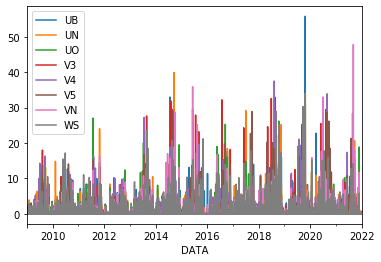

In [114]:
dataFrequencyResolved.plot()

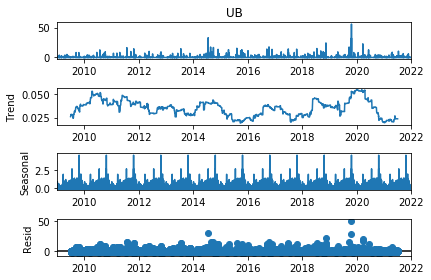

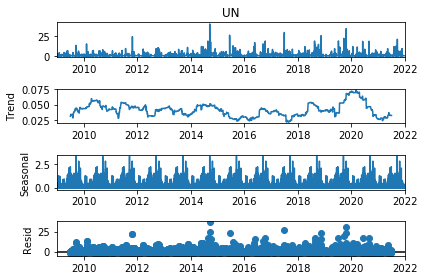

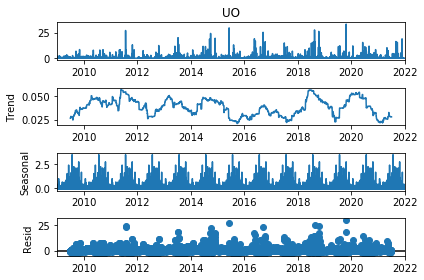

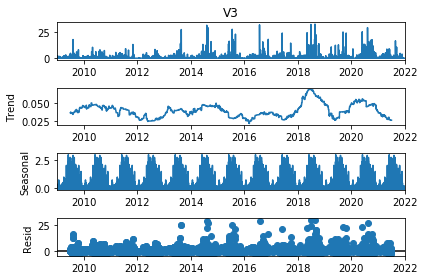

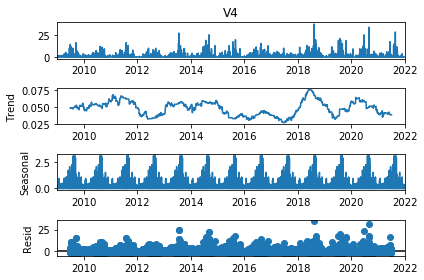

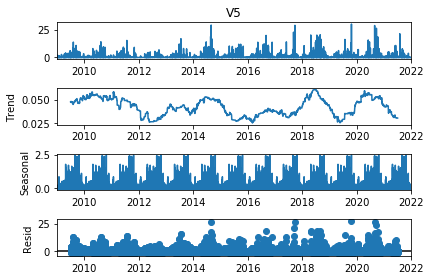

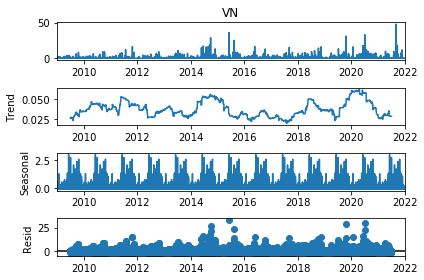

In [91]:
for x in range(1, len(dataFrequencyResolved.columns)):
    df_seasonal = seasonal_decompose(dataFrequencyResolved[data.columns[x]],model='additive', period=17520).plot()

Guardem el Dataframe 

In [29]:
    name = "dataSMC/fixed/UB-WS_Fixed.xlsx"
    dataFrequencyResolved.to_excel(name)

#### (KE i M6)

Aquestes dues estacions tinc dos arxius per cada estació. Un primer des de la Data inici fins a la data d'integració a la XEMA i un altre des de la integració fins al 2022.

Fitxers entregats un cop enviada la incidència (amb freqüencia de lectura de 5 min):

| Codi EMA | Nom EMA                    | Comarca  | Data inici | Data integració a la XEMA | X UTM (m) | Y UTM (m) | Z (m) | Fitxer                                |
|----------|----------------------------|----------|------------|---------------------------|-----------|-----------|-------|---------------------------------------|
| M6       | Sant Joan de les Abadesses | Ripollès | 13/01/1996 | 03/07/2015                | 437500    | 4674691   | 730   | dataSMC\SMC_KP_M6_KE\Sr-15613__M6.txt |
| KE       | Pantà de Sau               | Osona    | 05/01/1996 | 12/11/2015                | 451448    | 4646464   | 426   | dataSMC\SMC_KP_M6_KE\Sr-15613__KE.txt |

##### 1 Canviem la freqüència

Canvio la freqüencia i guardo els DF a:


M6 &rarr; **dataSMC\SMC_KP_M6_KE\fixed\Sr-15613__M6_Fixed.xlsx**

KE &rarr; **dataSMC\SMC_KP_M6_KE\fixed\Sr-15613__KE_Fixed.xlsx**

In [112]:
# Primerament he de canviar la freqüencia a 30 min
path = 'dataSMC/SMC_KP_M6_KE'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
for path in filePaths:
    # creem el path
    data = pd.read_csv("dataSMC/SMC_KP_M6_KE/"+path, sep='\t')
    # agafem les columnes DATA i PPT i --> DATA la posem com a index
    data = data[["DATA", "PPT"]].set_index('DATA')
    data.index = pd.to_datetime(data.index)
    # canviem la freqüèmcia del DF de 5' a 30' sumant els valors de 5' 
    data = data.resample('30T', label='right', closed='right').sum()
    name = re.findall(r"(.+)\.", path)[0]
    name = "dataSMC/SMC_KP_M6_KE/fixed/" + name + '_Fixed.xlsx'
    data.to_excel(name)

##### 2 Ajuntem els dos arxius

M6 &rarr; **dataSMC/Sr_15125_M6.xlsx** i **dataSMC/SMC_KP_M6_KE/fixed/Sr-15613__M6_Fixed.xlsx**

KE &rarr; **dataSMC/Sr_15125_KE.xlsx** i **dataSMC/SMC_KP_M6_KE/fixed/Sr-15613__KE_Fixed.xlsx**

In [59]:
def combineTwoDataframesPriorizeLeft(dfLFixed,dfR): # Function definition
    """
    Es combinen el dfLFixed i el dfR tenint pes el dfLFixed quan els dos tenen valors en el mateix punt de temps.
    """
   
    data1 = pd.read_excel("dataSMC/SMC_KP_M6_KE/fixed/"+dfLFixed,index_col=0 )
    data2 =  pd.read_excel("dataSMC/"+dfR, index_col=0)
    
    nameFixed = re.findall(r"_([A-Z]\d|[A-Z]+)_", dfLFixed)[0]
    data1.rename(columns = {'PPT':nameFixed}, inplace = True)

    name = re.findall(r"_([A-Z]\d|[A-Z]+).", dfR)[0]
    data2 = data2[["DATA", "PPT"]].set_index('DATA')
    data2.rename(columns = {'PPT':name}, inplace = True)

    return data1.combine_first(data2)

In [60]:
M6 = combineTwoDataframesPriorizeLeft("Sr-15613__M6_Fixed.xlsx","Sr_15125_M6.xlsx")
KE = combineTwoDataframesPriorizeLeft("Sr-15613__KE_Fixed.xlsx","Sr_15125_KE.xlsx")

##### 3 Analitzem els resultats obtinguts
Tornem a observar i analitzar les dades:

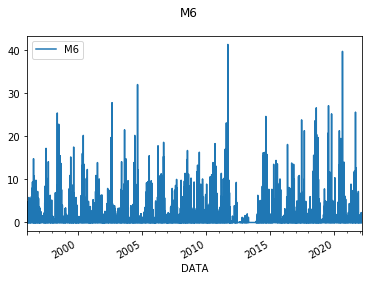

In [67]:
M6.plot(title="M6", subplots=True)    
plt.show()

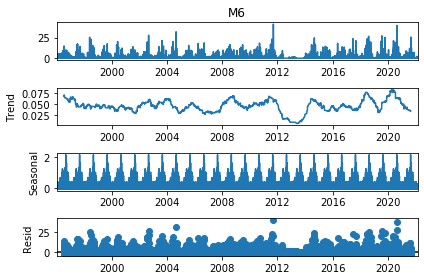

In [62]:
M6['M6'] = M6['M6'].replace(np.nan, 0)
df_seasonal = seasonal_decompose(M6["M6"],model='additive', period=17520)
df_seasonal.plot()    
plt.show()

No dono per correcte aquest DF **M6** perque sembla ser que les dades del 2012 al 2014 no són del tot correctes

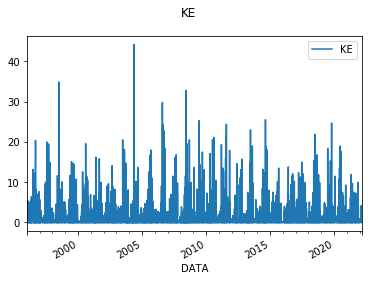

In [64]:
KE.plot(title="KE", subplots=True)    
plt.show()

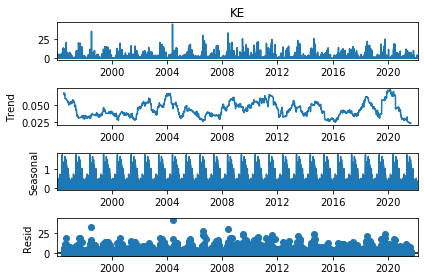

In [65]:
KE['KE'] = KE['KE'].replace(np.nan, 0)
df_seasonal = seasonal_decompose(KE["KE"],model='additive', period=17520)
df_seasonal.plot()    
plt.show()

Dono per bo el DF **KE**

Guardo els Dataframes finals(ajuntats):


~~M6 &rarr; **dataSMC/fixed/Sr-15613__M6_FixedF.xlsx**~~

KE &rarr; **dataSMC/fixed/Sr-15613__KE_FixedF.xlsx**

In [49]:
#M6.to_excel("dataSMC/fixed/M6_FixedF.xlsx")
KE.to_excel("dataSMC/fixed/KE_FixedF.xlsx")

### DataFrame de les estacions que he de tractar perque no tinc totes les dades ni freqüències

Taula de Correspondències:

| Estació1 | Estació2 | Estació3 | Estació final | Lloc     |
|----------|----------|----------|---------------|----------|
| DM       | WF       | XJ       | DM-WF-XJ      | Girona   |
| Z4       | ZC       | DG?      | Z4-ZC         | Ulldeter |


| CODI\_ESTACIO | NOM\_ESTACIO       | CODI\_TIPUS | LATITUD   | LONGITUD | Georeferència            | EMPLACAMENT                                  | ALTITUD | CODI\_MUNICIPI | NOM\_MUNICIPI | CODI\_COMARCA | NOM\_COMARCA | CODI\_PROVINCIA | NOM\_PROVINCIA | CODI\_XARXA | NOM\_XARXA | CODI\_ESTAT | NOM\_ESTAT    | DATA\_ALTA             | DATA\_BAIXA            |
| ------------- | ------------------ | ----------- | --------- | -------- | ------------------------ | -------------------------------------------- | ------- | -------------- | ------------- | ------------- | ------------ | --------------- | -------------- | ----------- | ---------- | ----------- | ------------- | ---------------------- | ---------------------- |
| DM            | Girona - Bombers   | A           | 4.196.012 | 280.696  | POINT (2.80696 41.96012) | Parc de Bombers                              | 90      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 05/10/2001 12:00:00 AM | 09/15/2010 12:00:00 AM |
| WF            | Vilablareix        | A           | 4.195.425 | 277.578  | POINT (2.77578 41.95425) | Mas Saüch                                    | 108     | 482            | Vilablareix   | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 04/11/2001 12:00:00 AM | 10/01/2015 12:00:00 AM |
| XJ            | Girona             | A           | 4.198.223 | 280.686  | POINT (2.80686 41.98223) | Horts de Santa Eugènia                       | 72      | 467            | Girona        | 20            | Gironès      | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/15/2010 12:00:00 AM |                        |
| Z4            | Ulldeter (2.364 m) | A           | 4.242.205 | 2.2524   | POINT (2.2524 42.42205)  | Ulldeter                                     | 2364    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 1           | Desmantellada | 11/08/2000 12:00:00 AM | 09/20/2011 12:00:00 AM |
| ZC            | Ulldeter (2.410 m) | A           | 4.242.117 | 224.565  | POINT (2.24565 42.42117) | Ulldeter                                     | 2410    | 715            | Setcases      | 31            | Ripollès     | 17              | Girona         | 1           | XEMA       | 2           | Operativa     | 09/28/2011 12:00:00 AM |



| CODI\_ESTACIO | NOM\_ESTACIO       | CODI\_TIPUS | LATITUD   | LONGITUD | Georeferència            | EMPLACAMENT                                  | ALTITUD | CODI\_MUNICIPI | NOM\_MUNICIPI | CODI\_COMARCA | NOM\_COMARCA | CODI\_PROVINCIA | NOM\_PROVINCIA | CODI\_XARXA | NOM\_XARXA | CODI\_ESTAT | NOM\_ESTAT    | DATA\_ALTA             | DATA\_BAIXA            |
| ------------- | ------------------ | ----------- | --------- | -------- | ------------------------ | -------------------------------------------- | ------- | -------------- | ------------- | ------------- | ------------ | --------------- | -------------- | ----------- | ---------- | ----------- | ------------- | ---------------------- | ---------------------- |
| DG            | Núria (1.971 m)            | A           | 4.239.848 | 215.517  | POINT (2.15517 42.39848) | Santuari de Núria                        | 1971.4  | 710            | Queralbs                   | 31            | Ripollès        | 17              | Girona         | 1           | XEMA       | 2           | Operativa  | 05/15/1998 12:00:00 AM |


In [71]:
# DF actual sense canviar res

df2 = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')
# itero per totes les dades i creo el df
path = 'dataSMC/ATractar/'
filePaths = [f for f in listdir(path) if isfile(join(path, f))]
for path in filePaths:
    weatherStationName = re.findall(r"_([A-Z]\d|[A-Z]+).", path)[0]
    data = pd.read_excel("dataSMC/ATractar/"+path, index_col=0)
    data = data[["DATA", "PPT"]].set_index('DATA')
    data.rename(columns = {'PPT': weatherStationName}, inplace = True)
    df2 = df2.join(data, how='left')
    
df2.loc["09/19/2011 23:00:00 ": "09/29/2011 16:00:00 "]

,DM,WF,XJ,Z4,ZC
DATA,,,,,
2011-09-19 23:00:00,NaN,0.0,0.0,0.0,NaN
2011-09-19 23:30:00,NaN,NaN,0.0,0.0,NaN
2011-09-20 00:00:00,NaN,0.0,0.0,NaN,NaN
2011-09-20 00:30:00,NaN,NaN,0.0,NaN,NaN
2011-09-20 01:00:00,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...
2011-09-29 14:00:00,NaN,0.0,0.0,NaN,0.0
2011-09-29 14:30:00,NaN,NaN,0.0,NaN,0.0
2011-09-29 15:00:00,NaN,0.0,0.0,NaN,0.0


#### DM-WF-XJ Girona
Per construir el Df de Girona, uniré les estacions DM i XJ. El dia que hi ha sense dades (tot i que a la taula posi que no), utilitzaré les dades de WF que es una estació de costat de Girona, aquestes són horàries però posaré 0's als 30' que quedin amb NaN. El DF resultant li diré DM-WF-XJ.

In [4]:
DM = pd.read_excel("dataSMC/ATractar/Sr_15125_DM.xlsx", index_col=0)
DM = DM[["DATA", "PPT"]].set_index('DATA')

XJ = pd.read_excel("dataSMC/ATractar/Sr_15125_XJ.xlsx", index_col=0)
XJ = XJ[["DATA", "PPT"]].set_index('DATA')

WF = pd.read_excel("dataSMC/ATractar/Sr_15125_WF.xlsx", index_col=0)
WF = WF[["DATA", "PPT"]].set_index('DATA')

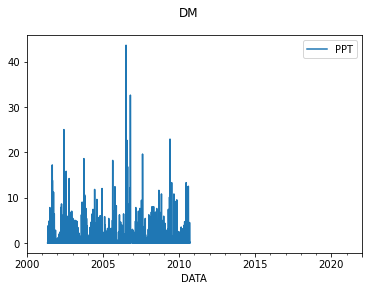

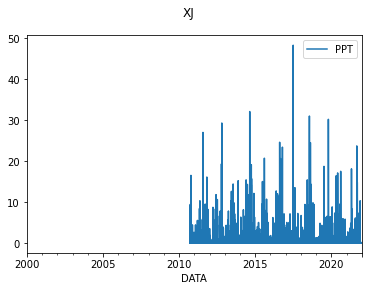

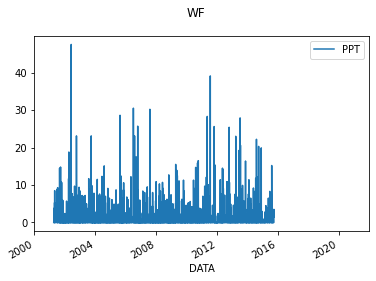

In [12]:
DM.plot(title="DM", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
XJ.plot(title="XJ", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
WF.plot(title="WF", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()

In [107]:
DM_XJ = DM.combine_first(XJ)
#DM_XJ.loc["14/09/2010  23:00:00": "15/09/2010  15:30:00"]
DM_XJ_WF = DM_XJ.combine_first(WF)
#DM_XJ_WF.loc["14/09/2010  23:00:00": "15/09/2010  15:30:00"]
DM_XJ_WF = DM_XJ_WF.fillna(value=0)

DM_XJ_WF.rename(columns = {'PPT': "DM_XJ_WF"}, inplace = True)

Guardo el Dataframes:

DM_XJ_WF &rarr; **dataSMC/ATractar/fixed/DM_XJ_WF_Fixed.xlsx**

In [109]:
DM_XJ_WF.to_excel("dataSMC/ATractar/fixed/DM_XJ_WF_Fixed.xlsx")

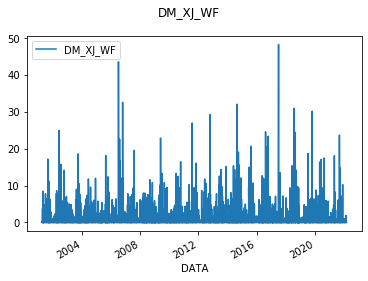

In [111]:
DM_XJ_WF.plot(title="DM_XJ_WF", subplots=True)    
plt.show()

#### Z4-ZC	Ulldeter

Per construir el Df d'Ulldeter, uniré les estacions Z4 i ZC. Els dies que hi ha sense dades, utilitzaré les dades de DG que és l'estació de Núria. Ulldeter es una estació important i les dades de Núria són les que poden ser mes representatives de la zona. El DF resultant li diré Z4-ZC.

In [14]:
Z4 = pd.read_excel("dataSMC/ATractar/Sr_15125_Z4.xlsx", index_col=0)
Z4 = Z4[["DATA", "PPT"]].set_index('DATA')

ZC = pd.read_excel("dataSMC/ATractar/Sr_15125_ZC.xlsx", index_col=0)
ZC = ZC[["DATA", "PPT"]].set_index('DATA')

DG = pd.read_excel("dataSMC/Sr_15125_DG.xlsx", index_col=0)
DG = DG[["DATA", "PPT"]].set_index('DATA')

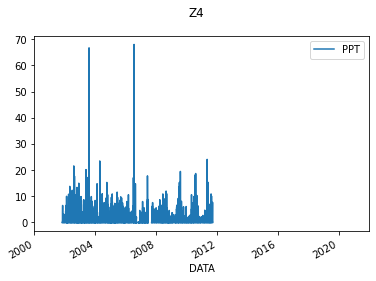

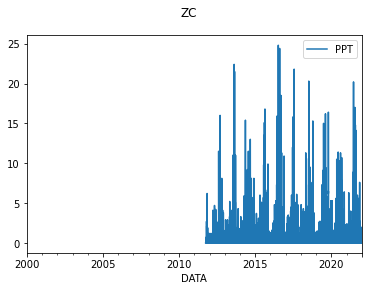

In [16]:
Z4.plot(title="Z4", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()
ZC.plot(title="ZC", subplots=True)
plt.xlim([datetime.date(2000, 1, 1), datetime.date(2022, 1, 1)])
plt.show()

In [122]:
Z4_ZC = ZC.combine_first(Z4)
#Z4_ZC.loc["19/09/2011  23:30:00": "28/09/2011  11:00:00"]
Z4_ZC = Z4_ZC.combine_first(DG)
#Z4_ZC.loc["19/09/2011  23:30:00": "28/09/2011  11:00:00"]

Z4_ZC.rename(columns = {'PPT': "Z4_ZC"}, inplace = True)

Guardo el Dataframes:

Z4_ZC &rarr; **dataSMC/ATractar/fixed/Z4_ZC_Fixed.xlsx**

In [124]:
Z4_ZC.to_excel("dataSMC/ATractar/fixed/Z4_ZC_Fixed.xlsx")

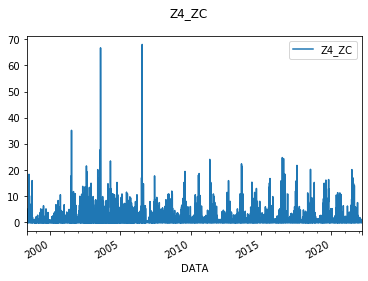

In [123]:
Z4_ZC.plot(title="Z4_ZC", subplots=True)    
plt.show()

#### DF Final a Tractar

dataSMC/ATractar/fixed/DM_XJ_WF_Fixed.xlsx

dataSMC/ATractar/fixed/Z4_ZC_Fixed.xlsx

In [126]:
#dataSMC/ATractar/fixed/DM_XJ_WF_Fixed.xlsx
#dataSMC/ATractar/fixed/Z4_ZC_Fixed.xlsx

dfAtractar = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')

DM_XJ_WF = pd.read_excel("dataSMC/ATractar/fixed/DM_XJ_WF_Fixed.xlsx", index_col=0)
Z4_ZC = pd.read_excel("dataSMC/ATractar/fixed/Z4_ZC_Fixed.xlsx", index_col=0)

dfAtractar = dfAtractar.join(DM_XJ_WF, how='left').join(Z4_ZC, how='left')

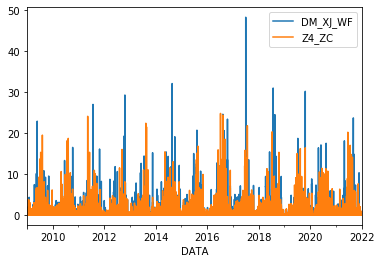

In [128]:
dfAtractar.plot()

Guardo el Dataframe:  
dataSMC/fixed/aTractar_Fixed.xlsx

In [129]:
dfAtractar.to_excel("dataSMC/fixed/aTractar_Fixed.xlsx")

### DataFrame FINAL

Creo el DataFrame final del SMC a partir dels diferents exels amb les dades tractades:

KE_FixedF.xlsx  &rarr; *dataSMC/fixed/KE_FixedF.xlsx*

UB-WS_Fixed.xlsx   &rarr; *dataSMC/fixed/UB-WS_Fixed.xlsx*

aTractar_Fixed.xlsx  &rarr; *dataSMC/fixed/aTractar_Fixed.xlsx*

df_dadesComplertesATracatar.csv  &rarr;  dataSMC/df_dadesComplertesATracatar.csv


| Arxiu                           | Ubicació                                  | Estacions                                      |
|---------------------------------|-------------------------------------------|------------------------------------------------|
| KE_FixedF.xlsx                  | *dataSMC/fixed/KE_FixedF.xlsx*            | KE                                             |
| UB-WS_Fixed.xlsx                | *dataSMC/fixed/UB-WS_Fixed.xlsx*          | "UB", "UN", "UO", "V3", "V4", "V5", "VN", "WS" |
| aTractar_Fixed.xlsx             | *dataSMC/fixed/aTractar_Fixed.xlsx*       |           "DM-WF-XJ Girona", "Z4-ZC Ulldeter"  |
| df_dadesComplertesATracatar.csv | *dataSMC/df_dadesComplertesATracatar.csv* | "CC", "CG", "CI", "CY", "DG", "DJ", "DN"       |

In [143]:
# DataFrame base
DF_SMC = pd.DataFrame({'DATA':pd.date_range("2009-01-01", periods=227905, freq="30T")}).set_index('DATA')

In [144]:
# dades Complertes i correctes no tractades
dataGlobal = pd.read_csv('dataSMC/df_dadesComplertesATracatar.csv',sep=',')
dataComplerta = dataGlobal[["DATA", "CC", "CG", "CI", "CY", "DG", "DJ", "DN"]]
dataComplerta = dataComplerta.astype({'DATA': 'datetime64[ns]'})
dataComplerta = dataComplerta.set_index('DATA')

In [145]:
# dades tractades
KE_Fixed = pd.read_excel("dataSMC/fixed/KE_FixedF.xlsx", index_col=0)
UB_WS_Fixed = pd.read_excel("dataSMC/fixed/UB-WS_Fixed.xlsx", index_col=0)
aTractar_Fixed = pd.read_excel("dataSMC/fixed/aTractar_Fixed.xlsx", index_col=0)

In [146]:
# Unió de les dades tractades i complertes
DF_SMC = DF_SMC.join(dataComplerta, how='left').join(KE_Fixed, how='left').join(UB_WS_Fixed, how='left').join(aTractar_Fixed, how='left')

In [147]:
# CC	CG	CI	CY	DG	DJ	DN	KE	M6	UB	UN	UO	V3	V4	V5	VN	WS
DF_SMC

,CC,CG,CI,CY,DG,DJ,DN,KE,UB,UN,UO,V3,V4,V5,VN,WS,DM_XJ_WF,Z4_ZC
DATA,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 22:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0


Guardo el Dataframe Final de SMC:  
DF_SMC  &rarr; **finalsDF/DF_SMC.csv**

In [149]:
#DF_SMC.to_csv('finalsDF/DF_SMC.csv', encoding='utf-8')
DF_SMC.to_excel("finalsDF/DF_SMC.xlsx")

In [2]:
DF_SMC_2 = pd.read_excel("finalsDF/DF_SMC.xlsx", index_col=0)

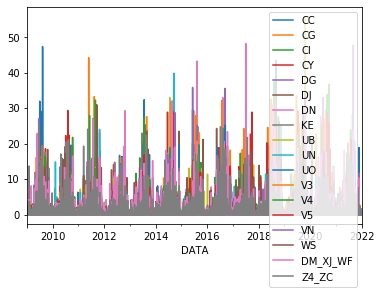

In [3]:
DF_SMC_2.plot()